In [ ]:
##第一階段作業：爬取資料、資料視覺化
pip install twstock
pip install --upgrade mplfinance

In [1]:
import twstock
import pandas as pd
import matplotlib 
import mplfinance as mpf

In [2]:
#抓取資料（參考：https://hackmd.io/@s02260441/HJcMcnds8）
stock = twstock.Stock('0050')
print(twstock.codes['0050'])

StockCodeInfo(type='ETF', code='0050', name='元大台灣50', ISIN='TW0000050004', start='2003/06/30', market='上市', group='', CFI='CEOGEU')


In [3]:
price = stock.fetch_from(2010, 1) #股市建立於2003/6/30，但資料從2010/1/4才開始有

In [4]:
name_attribute = ['Date', 'Capacity', 'Volume', 'Open', 'High', 'Low', 'Close', 'Change', 'Transcation']

In [10]:
df = pd.DataFrame(data = price, columns = name_attribute)
df.head()
df.tail()

,Date,Capacity,Volume,Open,High,Low,Close,Change,Transcation
3512,2024-04-26,6054296,945852784,156.00,156.80,155.50,156.00,2.50,7970
3513,2024-04-29,8135962,1289630787,157.30,159.10,157.30,158.80,2.80,10501
3514,2024-04-30,4792141,761950562,158.60,159.35,158.25,158.25,-0.55,6586
3515,2024-05-02,6666498,1042279767,157.35,157.35,156.00,156.15,-2.10,12625
3516,2024-05-03,5935465,936184397,158.55,158.65,156.45,156.95,0.80,6876


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3517 non-null   datetime64[ns]
 1   Capacity     3517 non-null   int64         
 2   Volume       3517 non-null   int64         
 3   Open         3517 non-null   float64       
 4   High         3517 non-null   float64       
 5   Low          3517 non-null   float64       
 6   Close        3517 non-null   float64       
 7   Change       3517 non-null   float64       
 8   Transcation  3517 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 247.4 KB


(3517, 9)

In [8]:
#save dataframe
df.to_csv('./stock_0050_price.csv')

In [78]:
#save subset dataframe 2024
df_sub.to_csv('./0050_2024price.csv')

In [27]:
#資料視覺化（參考：https://hackmd.io/v7m8LMfzQHu1y_dQNuXwbQ）
#read data
df = pd.read_csv('./stock_0050_price.csv', parse_dates = True, index_col = 1)

In [28]:
df.head()

,Unnamed: 0,Capacity,Volume,Open,High,Low,Close,Change,Transcation
Date,,,,,,,,,
2010-01-04,0,20083125,1132155005,56.45,56.65,56.05,56.50,0.05,1624
2010-01-05,1,16453854,932015376,56.80,56.90,56.15,56.50,0.00,1866
2010-01-06,2,19012172,1087143829,56.50,57.75,56.50,57.55,1.05,2958
2010-01-07,3,14110575,814344344,57.60,58.15,57.30,57.40,-0.15,1846
2010-01-08,4,11342752,651830965,57.30,57.75,57.05,57.75,0.35,1493


<Axes: xlabel='Date'>

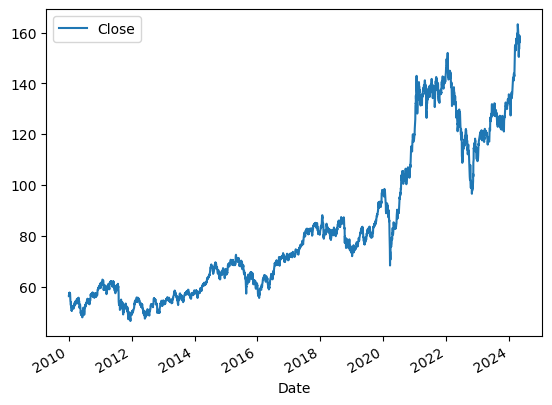

In [29]:
#visualize stock price 粗略看一下股價走勢
df.plot.line(y = 'Close', use_index = True)

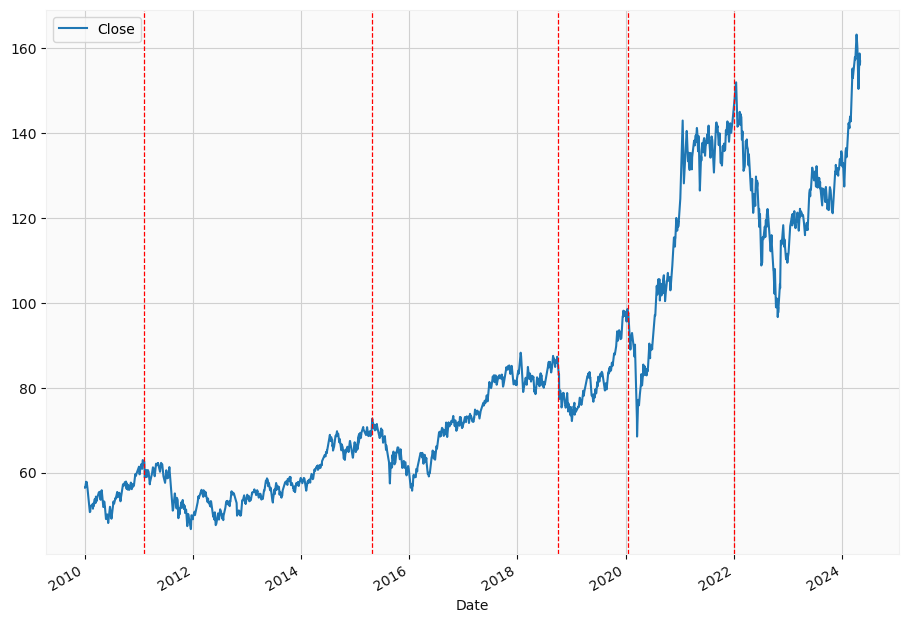

In [63]:
#標注重大經融事件
ax = df.plot.line(y = 'Close', use_index = True, figsize = (11, 8))
events = ['2011-02-08', '2015-04-28', '2018-10-02', '2020-01-20', '2022-01-05']
for i in events:
    ax.axvline(pd.to_datetime(i), color = 'r', linestyle = '--', lw = 0.9)

In [65]:
#匯出圖
ax.figure.savefig('0050_lineplot.png')

In [32]:
#2024年的股價細看趨勢
#subset past one year data
df_sub = df.loc['2024-01-01':]

In [33]:
df_sub.head()

,Unnamed: 0,Capacity,Volume,Open,High,Low,Close,Change,Transcation
Date,,,,,,,,,
2024-01-02,3439,6283610,848793104,135.60,135.95,134.65,134.90,-0.55,10013
2024-01-03,3440,14783894,1963126583,133.70,133.90,132.30,132.55,-2.35,25258
2024-01-04,3441,4838660,641202865,132.55,132.75,132.30,132.50,-0.05,7094
2024-01-05,3442,4566320,604475455,132.55,132.95,132.10,132.15,-0.35,12744
2024-01-08,3443,9657556,1285524342,133.00,133.60,132.75,132.75,0.60,9876


In [41]:
#create plot style
mc = mpf.make_marketcolors(up = 'red', down = 'green', inherit = True)
s  = mpf.make_mpf_style(marketcolors = mc, base_mpf_style = 'yahoo')

In [86]:
kwargs = dict(type = 'candle', volume = True, title = '0050 Stock Price', mav = (5, 20, 60), style = s, figratio = (15,9), figscale = 0.90,
             show_nontrading = True)

In [88]:
mpf.plot(df_sub, **kwargs, savefig = '0050_mpfplot.png')